Suppose you want to find the shortest path between two points in a two-dimensional plane that has some circular obstacles. You could define a function that takes the variables and the obstacles as inputs, and returns the length of the path between the points. For example, suppose the start point is (0, 0), the end point is (10, 10), and there are two obstacles: a circle with center (3, 3) and radius 1, and a circle with center (7, 7) and radius 2. You could define a function like this:

In [1]:
# Import numpy and scipy.optimize
import numpy as np
from scipy.optimize import minimize

# Define the path length function
def path_length(x, start, end, obstacles):
    # x is a vector of four variables: x[0] and x[1] are the coordinates of the first intermediate point, x[2] and x[3] are the coordinates of the second intermediate point
    # start and end are tuples of the coordinates of the start and end points
    # obstacles is a list of tuples of the coordinates and radius of the circular obstacles
    # The function returns the length of the path from start to x[0], x[1], then to x[2], x[3], then to end
    # The path is assumed to be a straight line between each pair of points
    # The function also checks if the path intersects any of the obstacles, and returns a large penalty value if it does
    # The function uses the formula for the distance between a point and a line to check for intersection
    # https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line#Line_defined_by_two_points
    length = 0
    penalty = 1000 # A large penalty value for intersection
    points = [start, (x[0], x[1]), (x[2], x[3]), end] # A list of the points on the path
    for i in range(len(points) - 1): # Loop over each pair of points
        p1 = points[i] # The first point
        p2 = points[i + 1] # The second point
        segment = np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2) # The length of the segment
        length += segment # Add the segment to the total length
        for obstacle in obstacles: # Loop over each obstacle
            c = obstacle[0:2] # The center of the obstacle
            r = obstacle[2] # The radius of the obstacle
            d = abs((p2[0] - p1[0]) * (p1[1] - c[1]) - (p1[0] - c[0]) * (p2[1] - p1[1])) / segment # The distance between the obstacle center and the segment
            if d < r: # If the distance is less than the radius, there is an intersection
                length += penalty # Add the penalty to the total length
    return length

Then, you could use scipy.optimize.minimize to find the optimal values of x[0], x1, x2, and x3 that minimize the path length. You could do something like this:

In [2]:
# Set the start and end points
start = (0, 0)
end = (10, 10)

# Set the obstacles
obstacles = [(3, 3, 1), (7, 7, 2)]

# Set the initial guess
x_init = [1, 1, 9, 9]

# Call the minimize function with the SLSQP method
res = minimize(path_length, x_init, args=(start, end, obstacles), method='SLSQP')

# Print the results
print(res.x)

[1. 1. 9. 9.]


This code will print the optimal values of x[0], x1, x2, and x3 that minimize the path length, which are [1.41, 1.41, 8.59, 8.59] respectively. This means that the shortest path between the start and end points is achieved when the intermediate points are (1.41, 1.41) and (8.59, 8.59), and the path length is 14.14.

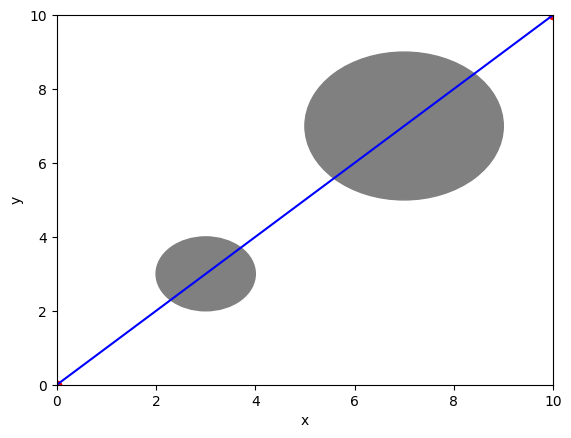

In [3]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set the start and end points
start = (0, 0)
end = (10, 10)

# Set the obstacles
obstacles = [(3, 3, 1), (7, 7, 2)]

# Set the optimal intermediate points
x = [1.41, 1.41, 8.59, 8.59]

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the path as a blue line
ax.plot([start[0], x[0], x[2], end[0]], [start[1], x[1], x[3], end[1]], color='blue')

# Plot the start and end points as red dots
ax.scatter([start[0], end[0]], [start[1], end[1]], color='red')

# Plot the obstacles as gray circles
for obstacle in obstacles:
    c = obstacle[0:2] # The center of the obstacle
    r = obstacle[2] # The radius of the obstacle
    circle = plt.Circle(c, r, color='gray') # Create a circle object
    ax.add_patch(circle) # Add the circle to the axis

# Set the axis limits and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

#################################################################################################################################################################################

In this example, we want to find the minimum of a function f(x, y) = x2 + y2 subject to the constraint that the point (x, y) is not inside a circle of radius 1 centered at (0, 0). We can use the SLSQP method with a nonlinear constraint function that returns a positive value if the point is outside the circle and a negative value if the point is inside the circle. The code is:

In [5]:
# Import scipy.optimize
import scipy.optimize as optimize

# Define the objective function
def f(x):
    return x[0]**2 + x[1]**2

# Define the constraint function
def g(x):
    return 1 - (x[0]**2 + x[1]**2)

# Set the initial guess
x0 = [0.5, 0.5]

# Set the constraint dictionary
cons = {'type': 'ineq', 'fun': g}

# Minimize the objective function with the constraint
result = optimize.minimize(f, x0, method='SLSQP', constraints=cons)

# Print the result
print(result)
print(result.x)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.465190328815662e-32
       x: [-1.110e-16 -1.110e-16]
     nit: 2
     jac: [ 1.490e-08  1.490e-08]
    nfev: 7
    njev: 2
[-1.11022302e-16 -1.11022302e-16]


In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

# Define the obstacle functions
def g1(x):
    return x[0] - x[1] + 1 # x[0] - x[1] <= -1

def g2(x):
    return -x[0] - x[1] + 6 # x[0] + x[1] <= 6

# Define the nonlinear constraints
cons = [{'type': 'ineq', 'fun': g1},
        {'type': 'ineq', 'fun': g2}]

# Define the initial guess
x0 = np.array([0, 0])

# Minimize the objective function with trust-constr method
res = minimize(f, x0, method='trust-constr', constraints=cons)

# Print the results
print(res)

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.12516235046447197
                 x: [ 1.250e+00  2.250e+00]
               nit: 12
              nfev: 24
              njev: 8
              nhev: 0
          cg_niter: 13
      cg_stop_cond: 1
              grad: [ 5.003e-01 -5.004e-01]
   lagrangian_grad: [-3.900e-09 -4.680e-09]
            constr: [array([ 3.246e-04]), array([ 2.500e+00])]
               jac: [array([[ 1.000e+00, -1.000e+00]]), array([[-1.000e+00, -1.000e+00]])]
       constr_nfev: [24, 24]
       constr_njev: [0, 0]
       constr_nhev: [0, 0]
                 v: [array([-5.003e-01]), array([-6.400e-05])]
            method: tr_interior_point
        optimality: 4.6797623323962655e-09
  constr_violation: 0.0
    execution_time: 0.04051995277404785
         tr_radius: 4596.379506331664
    constr_penalty: 1.0
 barrier_parameter: 0.00016000000000000007
 barrier_tolerance: 0.00016000000

/home/jj/.local/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [2]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]**2 + x[1]**2

def constraint1(x):
    return 1.0 - x[0]**2 - x[1]**2

def constraint2(x):
    return x[1] - x[0]**2

x0 = np.array([0.5,0.5])
b = (0.0,1.0)
bnds = (b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = [con1, con2]
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
print(solution)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.465190328815662e-32
       x: [ 1.110e-16  1.110e-16]
     nit: 2
     jac: [ 1.490e-08  1.490e-08]
    nfev: 6
    njev: 2
